In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#making linearly separable dataset
np.random.seed(69)
u1 = np.random.randint(-4, 5, size=(10, 3))
u2 = np.array([[1, 1, -1, -1, -1, 1, 1, 1, -1, 1]]).T
data = np.concatenate((u1, u2), axis = 1)

df = pd.DataFrame(data, columns = ['x1', 'x2', 'x3', 'y'])
df.to_csv('traindata.csv', index = False)
df1 = pd.read_csv('traindata.csv', header = 0)

In [38]:
#adding bias column to data
#its already there so skippu skippu nee
#----------

In [39]:
#making some plotting functions
def plotpoints(X, Yi):
    data = np.concatenate((X, Yi), axis = 1)
    for rec in data:
        if rec[3]<=-1: plt.plot(rec[1], rec[2], 'rX', ms = 8) #'r' is red, 'x' is x shaped dot
        else: plt.plot(rec[1],rec[2], 'go', ms = 8) #'g' is green, 'o' is circle shaped dot
            
def plotline(wi, fromwhere, towhere):
    x1 = np.arange(fromwhere, towhere)
    x2 = -1/wi[2]*(wi[1]*x1 + wi[0])
    plt.plot(x1, x2, linewidth = 4)

Text(0, 0.5, 'x2')

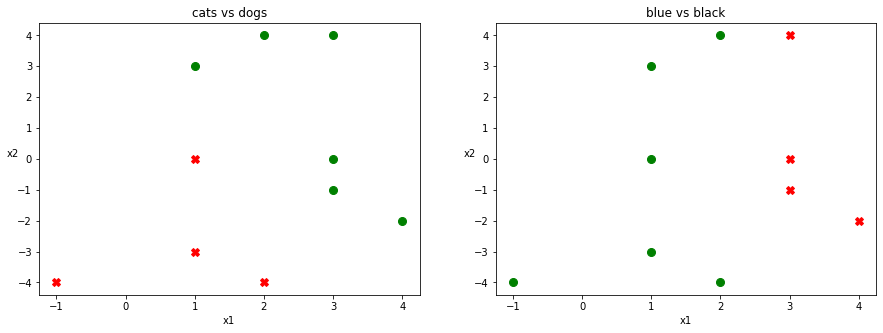

In [40]:
#splitting data into X and Y

X_train = data[:,:-2]
Y_train = data[:,-2:]

plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
plt.title('cats vs dogs')
plotpoints(X_train, Y_train[:, 0:1])
plt.xlabel('x1')
plt.ylabel('x2', rotation = 'horizontal')

plt.subplot(1, 2, 2)
plt.title('blue vs black')
plotpoints(X_train, Y_train[:, 1:2])
plt.xlabel('x1')
plt.ylabel('x2', rotation = 'horizontal')

In [41]:
#squisher function
def squish(Z):
    Y = []
    for r in Z:
        temp = []
        for ele in r:
            if ele > 0: temp.append(1)
            else: temp.append(-1)
        Y.append(temp)
    return np.array(Y)

In [42]:
# exline = np.array([[2, -1, 2]])
# print(exline)
# plotpoints(u1, u2)
# plotline(exline[0], -2, 6)

In [43]:
class Perceptron():
    def __init__(self, X, Y):
        np.random.seed(23)
        self.w = np.random.randint(-3,5, (len(X[0]), len(Y[0])))
        self.w = self.w.astype(np.float32)
        print('new weights:\n', self.w)

    def predict(self, X):
        z = np.matmul(X, self.w)
        #print('\nz = \n', z)
        a = squish(z)
        return a
    
    def train(self, X, Y, alpha = 0.6):
        #for all training data
        for t in range(len(X)):
            #for all columns of weights matrix
            for j in range(len(self.w[0])):
                self.w[:, j] = self.w[:, j] + (alpha*Y[t][j]*X[t])
        
                #print(f"Updated weights {i} :\n", self.w)               #uncomment this to see weight change every epoch
        
        
    def plot(self, X, Y, i):
        plotpoints(X, Y)
        plotline(self.w[:,i], min(X[:,1])-1, max(X[:, 1])+2)

In [44]:
p = Perceptron(X_train, Y_train)
# p.w = np.array([[0,3],
#                [0,-2],
#                [4,-1]])
print('y = \n', p.predict([[1, 2, -1], [1, 3, 1]]))

new weights:
 [[ 0.  3.]
 [-3. -2.]
 [ 3. -3.]]
y = 
 [[-1  1]
 [-1 -1]]


<Figure size 432x288 with 0 Axes>

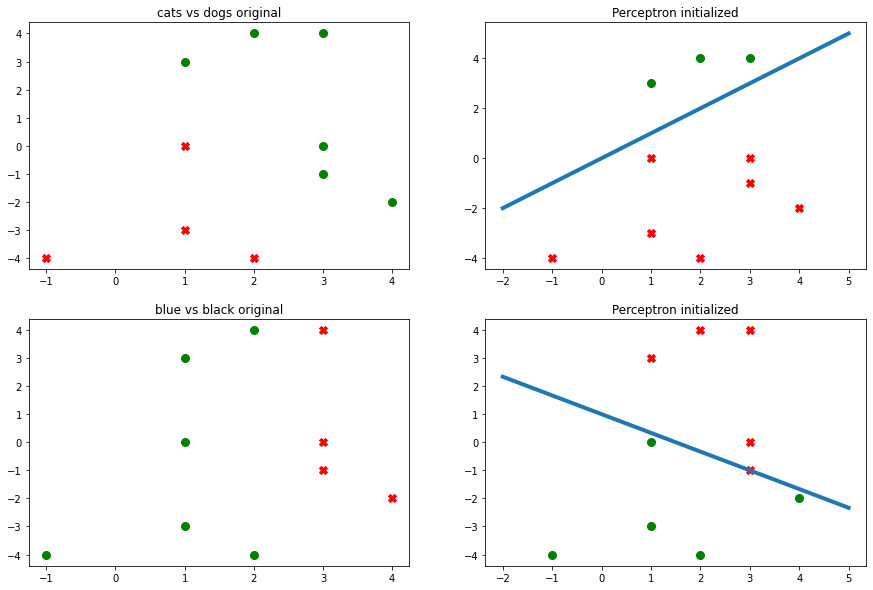

In [45]:
plt.figure(0)
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
plt.title('cats vs dogs original')
plotpoints(X_train, Y_train[:,0:1])

plt.subplot(2, 2, 2)
plt.title('Perceptron initialized')
p.plot(X_train, p.predict(X_train)[:, 0:1], 0)

plt.subplot(2, 2, 3)
plt.title('blue vs black original')
plotpoints(X_train, Y_train[:,1:2])

plt.subplot(2, 2, 4)
plt.title('Perceptron initialized')
p.plot(X_train, p.predict(X_train)[:, 1:2], 1)

In [46]:
p.predict([[1,-1,-4]])

array([[-1,  1]])

<Figure size 432x288 with 0 Axes>

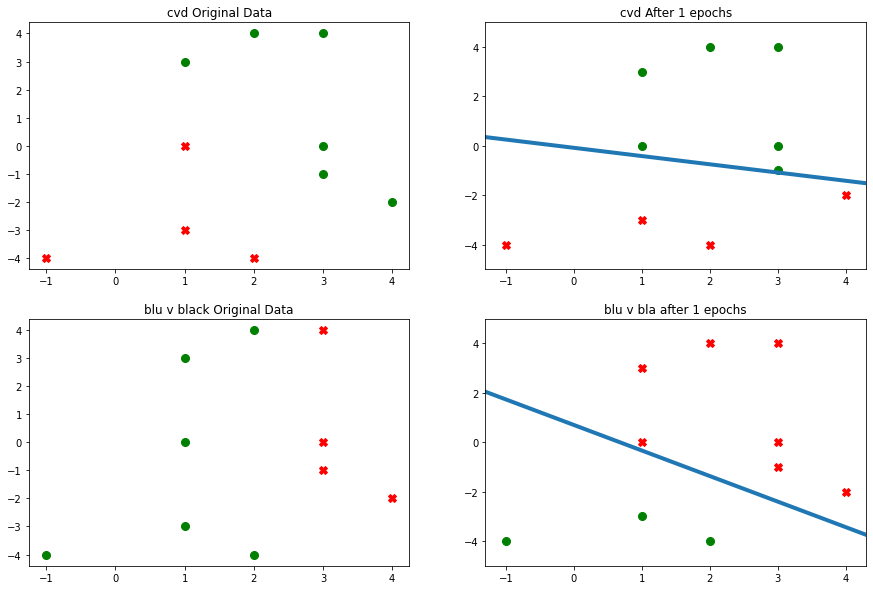

In [47]:
#Training phase

for i in range(1):
    p.train(X_train, Y_train)
    plt.figure(0)
    plt.figure(figsize = (15, 10))

    plt.subplot(2, 2, 1)
    plt.title('cvd Original Data')
    plotpoints(X_train, Y_train[:, 0:1])

    plt.subplot(2, 2, 2)
    plt.title('cvd After {} epochs'.format(i+1))
    p.plot(X_train, p.predict(X_train)[:, 0:1], 0)
    plt.ylim(-5, 5)
    plt.xlim(-1.3, 4.3)
    
    plt.subplot(2, 2, 3)
    plt.title('blu v black Original Data')
    plotpoints(X_train, Y_train[:, 1:2])

    plt.subplot(2, 2, 4)
    plt.title('blu v bla after {} epochs'.format(i+1))
    p.plot(X_train, p.predict(X_train)[:, 1:2], 1)
    plt.ylim(-5, 5)
    plt.xlim(-1.3, 4.3)
    